In [13]:
import pandas as pd

# 데이터셋 불러오기
file_path = 'C:\\Users\\co279\\mpi.csv'
data = pd.read_csv(file_path)

# 필요 없는 컬럼 제거
data = data.drop(columns=['last_name, first_name', 'player_id'])

# 결측치 처리 (예: 0으로 대체)
data = data.fillna(0)

# 두 변수 간의 피어슨 상관계수 계산
correlation_matrix = data.corr(method='pearson')

# 특정 변수와 다른 변수들 간의 상관계수 확인
target_variable = 'p_era'
correlation_with_target = correlation_matrix[target_variable].sort_values(ascending=False)

print(f"피어슨 상관계수 행렬:\n{correlation_matrix}")
print(f"\n{target_variable} 변수와 다른 변수들 간의 상관계수:\n{correlation_with_target}")

C:\Users\co279\AppData\Local\Temp\ipykernel_24192\3098881943.py:14: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr(method='pearson')


피어슨 상관계수 행렬:
                            year     p_era  player_age    p_game  \
year                    1.000000  0.018452    0.068571 -0.029229   
p_era                   0.018452  1.000000   -0.040965 -0.385434   
player_age              0.068571 -0.040965    1.000000  0.204058   
p_game                 -0.029229 -0.385434    0.204058  1.000000   
p_formatted_ip         -0.085254 -0.064742    0.032067 -0.353354   
k_percent               0.142771 -0.503256   -0.016793  0.370616   
bb_percent              0.070891  0.192586   -0.096613  0.146930   
z_swing_percent         0.146547  0.039195   -0.012385  0.030618   
z_swing_miss_percent    0.173927 -0.372818   -0.018666  0.358627   
oz_swing_percent        0.004469 -0.346610    0.107656  0.190204   
oz_swing_miss_percent   0.234054 -0.304012   -0.081099  0.296398   
oz_contact_percent     -0.218964  0.304325    0.082597 -0.293619   
out_zone_swing_miss     0.022551 -0.175736    0.000553 -0.208440   
out_zone_swing         -0.078839 -0

In [28]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor

# 데이터셋 불러오기
file_path = 'C:\\Users\\co279\\mpi1.csv'
data = pd.read_csv(file_path)

# 필요 없는 컬럼 제거
data = data.drop(columns=['last_name, first_name', 'player_id'])

# 결측치 처리 (예: 평균값으로 대체)
data = data.fillna(0)

# 종속변수와 독립변수 분리
target = 'p_era'
features = data.columns.drop([target, 'year'])

# 독립변수만 선택
X = data[features]

# 숫자가 아닌 열을 확인
non_numeric_columns = X.select_dtypes(include=['object']).columns

# 숫자가 아닌 열을 더미 변수로 변환
X_encoded = pd.get_dummies(X, columns=non_numeric_columns)

# VIF 계산
vif_data = pd.DataFrame()
vif_data["feature"] = X_encoded.columns
vif_data["VIF"] = [variance_inflation_factor(X_encoded.values, i) for i in range(X_encoded.shape[1])]

# 출력 옵션 설정
pd.set_option('display.max_rows', None)

vif_data = vif_data[vif_data['VIF']<10]

# VIF 데이터 출력
print(vif_data)

                 feature       VIF
1                 p_game  9.024548
2         p_formatted_ip  7.849089
16        ff_avg_break_x  8.008408
20        sl_avg_break_x  2.989322
28        cu_avg_break_x  5.005805
32        si_avg_break_x  6.537344
36        fc_avg_break_x  1.751176
48        st_avg_break_x  1.915681
52        sv_avg_break_x  1.329846
68  breaking_avg_break_x  9.800716


c:\Users\co279\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


RMSE: 1.2251833260764275
MAE: 0.9529811819415327
MAPE: 0.25337193422427745
R2: -0.04516704189070664
           Feature  Coefficient
0   ff_avg_break_x     0.032927
12    sc_avg_speed     0.008940
3   cu_avg_break_x     0.004499
9   st_avg_break_x     0.003179
11  sv_avg_break_x    -0.000121
10    sv_avg_speed    -0.002974
8     st_avg_speed    -0.004589
1   sl_avg_break_x    -0.005926
2   ch_avg_break_x    -0.009256
6   fs_avg_break_x    -0.011529
4   si_avg_break_x    -0.013951
5   fc_avg_break_x    -0.025928
7   kn_avg_break_x    -0.174483


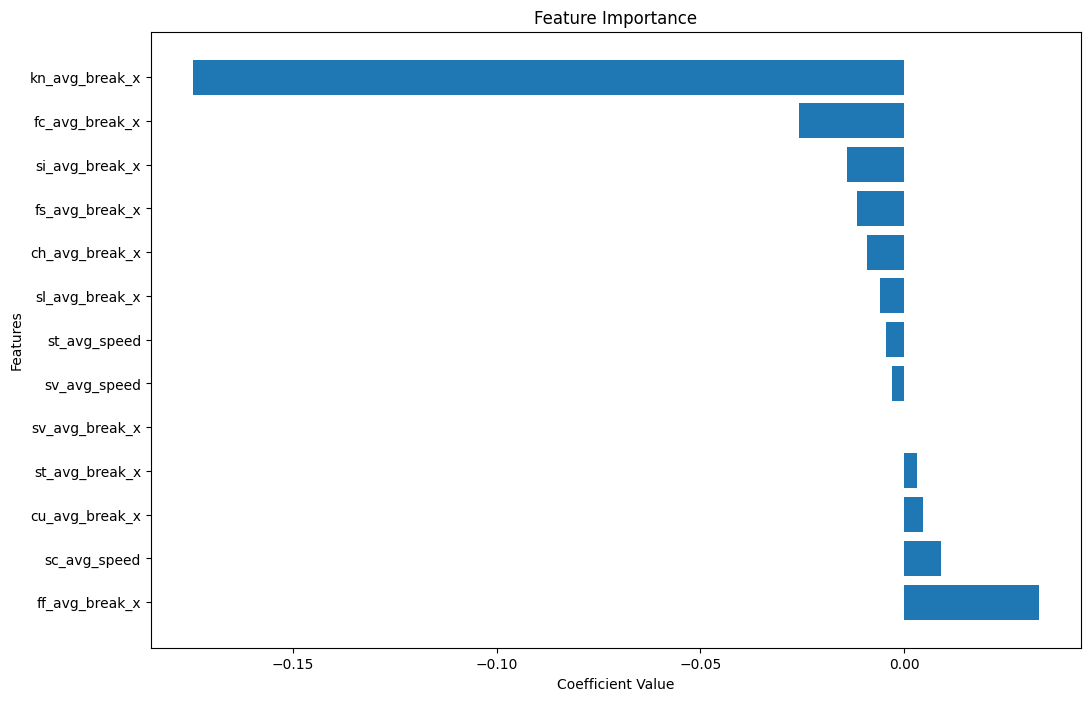

In [15]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, mean_absolute_percentage_error
from statsmodels.stats.outliers_influence import variance_inflation_factor

# 데이터셋 불러오기
file_path = 'C:\\Users\\co279\\mpi.csv'
data = pd.read_csv(file_path)

# 필요 없는 컬럼 제거
data = data.drop(columns=['last_name, first_name', 'player_id'])

# 결측치 처리 (예: 0으로 대체)
data = data.fillna(0)

# 학습 데이터와 테스트 데이터 분리
train_data = data[data['year'] != 2023]
test_data = data[data['year'] == 2023]

# 독립변수와 종속변수 분리
X_train = train_data.drop(columns=['p_era', 'year'])
y_train = train_data['p_era']
X_test = test_data.drop(columns=['p_era', 'year'])
y_test = test_data['p_era']

# 숫자가 아닌 열을 확인
non_numeric_X_train = X_train.select_dtypes(include=['object']).columns
X_train = pd.get_dummies(X_train, columns=non_numeric_X_train)

# 숫자가 아닌 열을 확인
non_numeric_X_test = X_test.select_dtypes(include=['object']).columns
X_test = pd.get_dummies(X_test, columns=non_numeric_X_test)

# 상관계수가 높은 변수들 제거
corr_matrix = X_train.corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]
X_train = X_train.drop(columns=to_drop)
X_test = X_test.drop(columns=to_drop)

# VIF 계산 함수
def calculate_vif(df):
    vif = pd.DataFrame()
    vif["feature"] = df.columns
    vif["VIF"] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    return vif

# VIF 계산
vif_data = calculate_vif(X_train)

# VIF가 10을 초과하는 변수 제거
features_below_10_vif = vif_data[vif_data["VIF"] <= 10]["feature"]
X_train_selected = X_train[features_below_10_vif]
X_test_selected = X_test[features_below_10_vif]

# 선형 회귀 모델 정의
model = LinearRegression()

# 모델 학습
model.fit(X_train_selected, y_train)

# 예측
y_pred = model.predict(X_test_selected)

# RMSE 계산
rmse = mean_squared_error(y_test, y_pred, squared=False)
print(f'RMSE: {rmse}')

mae = mean_absolute_error(y_test, y_pred)
print(f'MAE: {mae}')

mape = mean_absolute_percentage_error(y_test, y_pred)
print(f'MAPE: {mape}')

r2 = r2_score(y_test, y_pred)
print(f'R2: {r2}')

# 회귀 계수 확인
coefficients = pd.DataFrame({'Feature': X_train_selected.columns, 'Coefficient': model.coef_})
coefficients = coefficients.sort_values(by='Coefficient', ascending=False)
print(coefficients)

# 변수 중요도 시각화
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 8))
plt.barh(coefficients['Feature'], coefficients['Coefficient'])
plt.xlabel('Coefficient Value')
plt.ylabel('Features')
plt.title('Feature Importance')
plt.show()
